In [1]:
pip install --upgrade google-api-python-client

     --------------------------------------- 11.4/11.4 MB 11.3 MB/s eta 0:00:00
     -------------------------------------- 120.3/120.3 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 96.9/96.9 kB 5.8 MB/s eta 0:00:00
     ------------------------------------- 223.6/223.6 kB 14.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [18]:
api_key = 'AIzaSyD9TT95GKywhX7OOdbCj7TlSnYqDIK2***'
channel_ids = ['UCWsqW-VTmNFs9m20deW1gMg',  #Divyansh
              'UC62efsUgKggjHCQvabTAeUg',  #markaroni
              'UCXWWK4Qj0AS_EqXoYSET-8Q',  #yjr
              'UCV-aKADhLal5ki1ZqEAqjjw',  #tfhd
              'UCdH4P6zmwNsEhA5SihdpCGw']  #onemufc
youtube = build('youtube','v3', developerKey = api_key)

# Function to get channel statistics


In [44]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part = 'snippet,contentDetails,statistics',
        id = ','.join(channel_ids))
    response = request.execute()
    for i in range(len(response['items'])):
    	data = dict(channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']["subscriberCount"],
                    Views = response['items'][i]['statistics']["viewCount"],
                    Total_videos = response['items'][i]['statistics']["videoCount"],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
    	all_data.append(data)
    return all_data

In [45]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [46]:
channel_data = pd.DataFrame(channel_stats)

In [47]:
channel_data

,channel_name,Subscribers,Views,Total_videos,playlist_id
0,Talk Football HD,186000,52494159,1822,UUV-aKADhLal5ki1ZqEAqjjw
1,Markaroni,179000,70058589,604,UU62efsUgKggjHCQvabTAeUg
2,YjR,144000,29033901,666,UUXWWK4Qj0AS_EqXoYSET-8Q
3,Divyansh,178000,82837001,1284,UUWsqW-VTmNFs9m20deW1gMg
4,ONE MUFC,59700,23064146,1112,UUdH4P6zmwNsEhA5SihdpCGw


In [38]:
channel_data.dtypes

channel_name    object
Subscribers     object
Views           object
Total_videos    object
dtype: object

In [39]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])

In [40]:
channel_data.dtypes

channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
dtype: object

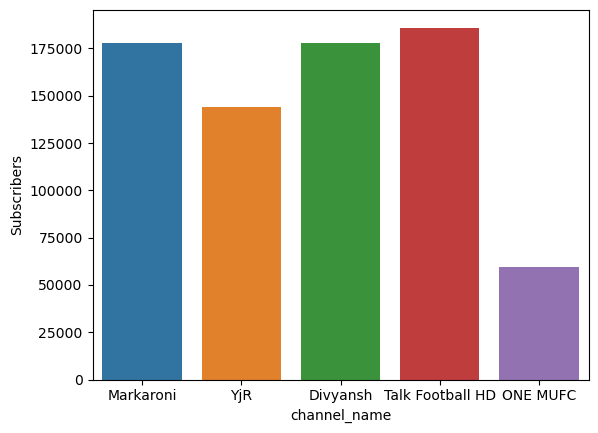

In [41]:
ax = sns.barplot(x='channel_name', y= 'Subscribers',data = channel_data )

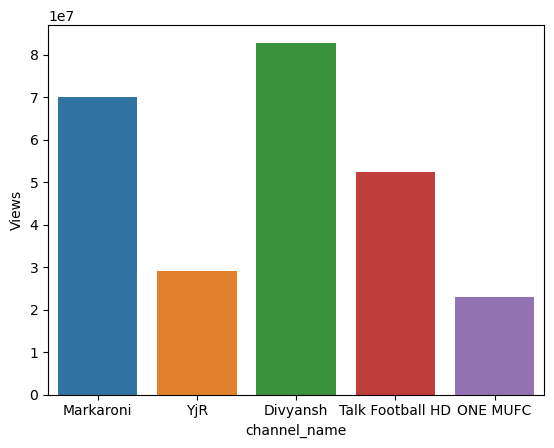

In [42]:
ax = sns.barplot(x='channel_name', y= 'Views',data = channel_data )

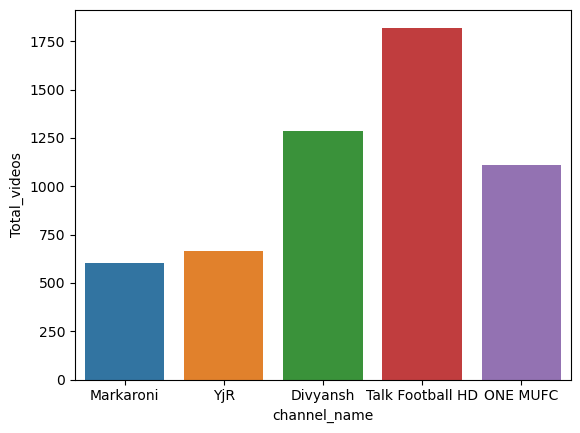

In [43]:
ax = sns.barplot(x='channel_name', y= 'Total_videos',data = channel_data )

# Function to get video id's

In [49]:
playlist_id = channel_data.loc[channel_data['channel_name']=='Divyansh','playlist_id'].iloc[0]

In [50]:
playlist_id

'UUWsqW-VTmNFs9m20deW1gMg'

In [119]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part='contentDetails',
        maxResults=50,
        playlistId=playlist_id)
    response = request.execute()
    video_ids = []
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
    next_page_token = response.get('nextPageToken')
    more_pages = True
    while more_pages:
        if next_page_token is None:
            more_pages = False
        
        else:
             request = youtube.playlistItems().list(
                        part='contentDetails',
                        maxResults=50,
                        playlistId=playlist_id,
                 	    pageToken=next_page_token)
             response = request.execute()
             for item in response['items']:
                    video_ids.append(item['contentDetails']['videoId'])
                    next_page_token = response.get('nextPageToken')
               
    return video_ids

In [120]:
video_ids = get_video_ids(youtube, playlist_id)

In [121]:
video_ids

['zR5MWYwVjvI',
 '64LxWV1S2rs',
 'OMofeTPysNQ',
 'TZX7R9ftem0',
 '2PvpvNpFt6Q',
 'ZLKSgRHZlyY',
 'GiNeuk3mPSE',
 'v1nemQ6D71A',
 '7r9YXSfpHTE',
 '93WUfHkqGkc',
 '1eZv2Sz3qdE',
 'G9bZWvRdEjk',
 'FVU775qYHOw',
 'xcKyOEbB_aI',
 'jN9kjSsP83c',
 'K2gJpjSW_0w',
 'i-b8NzylEOs',
 'f3BtGpOZLus',
 'pNi0Wu4I0gA',
 'QwzJgKfNDjI',
 'oqeP08vxuL4',
 'Q6UsDi3sVZE',
 'm1FZ5ciHit4',
 'tO8pfjZp-9s',
 'iVHbfCRemX0',
 'XmXK1KjSWWA',
 'cVoBrw7NucQ',
 '2U7cfRfDLrU',
 'JgSM4NERONU',
 '3YZO_n-0bUI',
 'M8-IEyz3MNo',
 'JNfXhz3-6nY',
 'hxQBmW6PZp4',
 'CqxfrTIoah8',
 'ofFaduQxknc',
 'iT7d77Nf0zE',
 'VbiUmHPR0_c',
 '4NfG9xu_Z_M',
 'SklpOVv18ds',
 '7rxXZeSho_A',
 'zypwLWNLuL4',
 'Lo7SBBSstlM',
 'Fbf3nmLRlPQ',
 '__YSalHfWCM',
 'ggJ7fqBuc5o',
 'AentEuB5ZcA',
 'y6V3hwQfIVI',
 '3aE4KXgVBWg',
 'OX1Q1_INJP0',
 'etVrmEu2qpE',
 '2zQOqGMF_Xg',
 '8iKIdQNvJdY',
 'eExIId2nrrQ',
 'cFEAq45Mj7Y',
 'm68CiF2PBDo',
 'D_CZckylYAg',
 'SDpwBqyRwo8',
 'K4qDdVC0Jx4',
 'yiX4gMCQxQ4',
 'L9rMbXlrbjY',
 'XjDtSLRIDgE',
 '6VDmlWYmG9M',
 'rEXzx4

# Function to get video details

In [155]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()
        for video in response['items']:
            snippet = video['snippet']
            statistics = video.get('statistics', {})
            video_stats = {
                'Title': snippet.get('title', ''),
                'Published_date': snippet.get('publishedAt', ''),
                'Views': statistics.get('viewCount', '0'),
                'Likes': statistics.get('likeCount', '0'),
                'Comments': statistics.get('commentCount', '0')
            }
            all_video_stats.append(video_stats)

    return all_video_stats


In [157]:
video_details = get_video_details(youtube, video_ids)

In [158]:
video_data = pd.DataFrame(video_details)

In [162]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])

In [163]:
video_data

,Title,Published_date,Views,Likes,Comments
0,AL-Hilal to announce Messi or will he wait for...,2023-06-06,52310,4895,429
1,Nagelsmann to Psg Confirm ! Messi exit effect ...,2023-06-05,53891,4610,281
2,"Official : Benzema Leaves Real Madrid, Harry k...",2023-06-04,75094,6170,541
3,Manchester City Won the FA Cup 2023 . Manchest...,2023-06-04,41386,3435,304
4,Can Manchester United Stop Manchester City and...,2023-06-03,39001,2935,311
...,...,...,...,...,...
1274,Fifa 21 Ultimate team | Sbc Pack Opening and M...,2020-10-05,230,7,2
1275,Fifa 21 Ultimate Team Squad Under 10K Budget F...,2020-10-04,342,16,2
1276,FIFA 21 Ultimate team Starter Pack In Hindi Ep...,2020-10-01,965,36,7
1277,Chelsea Vs Liverpool 0-2 Tactical Analysis + H...,2020-09-20,619,10,3


In [167]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

In [168]:
top10_videos

,Title,Published_date,Views,Likes,Comments
334,Ronaldo - Messi Chess Secret in Louis Vuitton ...,2022-11-21,2928346,319067,433
368,Why Biggest Match of Ronaldo - Messi Rivalry W...,2022-11-02,2592925,291182,311
489,"$900 Million Insurance ! Messi , Ronaldo , Bal...",2022-09-12,1771896,161970,711
265,Super Ballon d’or to Lionel Messi after Winnin...,2022-12-23,1688589,168374,3359
395,Lionel Messi Love for Argentina 🇦🇷 . Rejected ...,2022-10-22,1368208,135372,403
242,Football Biggest Moment Ft. Ronaldo World Cup ...,2023-01-02,1139863,145442,263
391,Top 5 Most Expensive football Contract Ft. Ron...,2022-10-24,1113064,120781,353
245,Ronaldo vs Messi One last time ? Psg vs Al nas...,2023-01-01,1101345,136687,660
230,Cristiano Ronaldo Could Play in India during h...,2023-01-08,976870,100845,472
401,"FIFA World Cup Final Biggest Upset , Brazil vs...",2022-10-20,898150,98620,316


C:\Users\rDish\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rDish\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


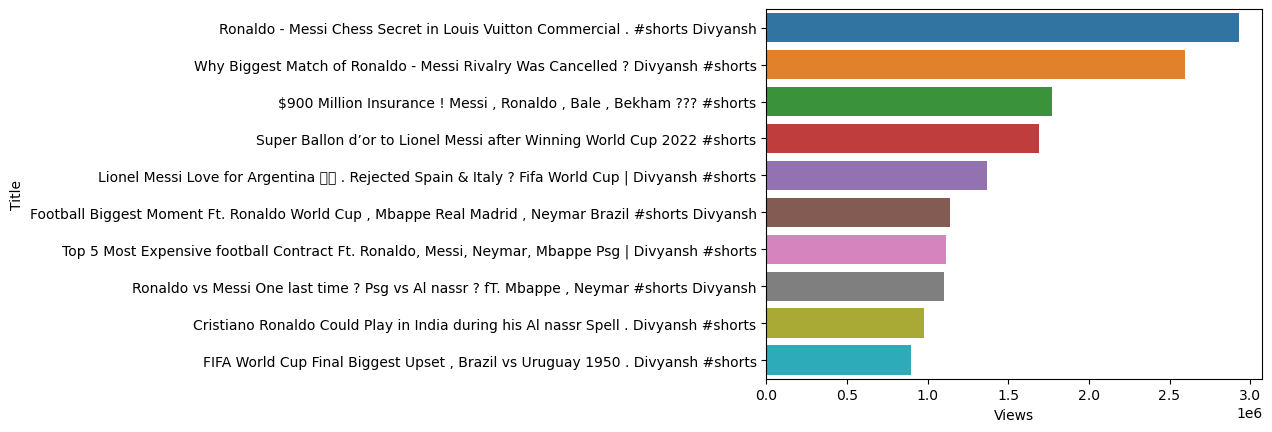

In [169]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

In [170]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [171]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,AL-Hilal to announce Messi or will he wait for...,2023-06-06,52310,4895,429,Jun
1,Nagelsmann to Psg Confirm ! Messi exit effect ...,2023-06-05,53891,4610,281,Jun
2,"Official : Benzema Leaves Real Madrid, Harry k...",2023-06-04,75094,6170,541,Jun
3,Manchester City Won the FA Cup 2023 . Manchest...,2023-06-04,41386,3435,304,Jun
4,Can Manchester United Stop Manchester City and...,2023-06-03,39001,2935,311,Jun
...,...,...,...,...,...,...
1274,Fifa 21 Ultimate team | Sbc Pack Opening and M...,2020-10-05,230,7,2,Oct
1275,Fifa 21 Ultimate Team Squad Under 10K Budget F...,2020-10-04,342,16,2,Oct
1276,FIFA 21 Ultimate team Starter Pack In Hindi Ep...,2020-10-01,965,36,7,Oct
1277,Chelsea Vs Liverpool 0-2 Tactical Analysis + H...,2020-09-20,619,10,3,Sep


In [174]:
video_per_month = video_data.groupby('Month',as_index= False).size()

In [175]:
video_per_month

,Month,size
0,Apr,132
1,Aug,96
2,Dec,129
3,Feb,102
4,Jan,129
5,Jul,77
6,Jun,63
7,Mar,103
8,May,103
9,Nov,114


In [176]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [177]:
video_per_month.index = pd.CategoricalIndex(video_per_month['Month'],categories=sort_order,ordered=True)

In [181]:
video_per_month = video_per_month.sort_index()

In [182]:
video_per_month

,Month,size
Month,,
Jan,Jan,129
Feb,Feb,102
Mar,Mar,103
Apr,Apr,132
May,May,103
Jun,Jun,63
Jul,Jul,77
Aug,Aug,96
Sep,Sep,114


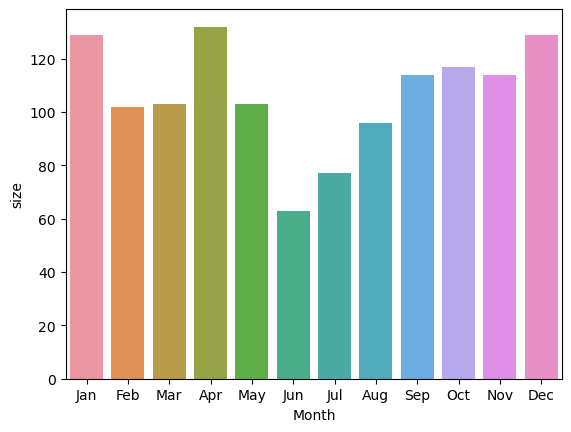

In [183]:
ax2 = sns.barplot(x='Month',y='size',data=video_per_month)

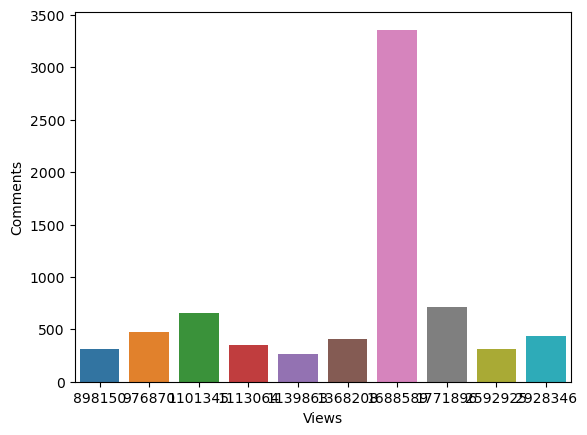

In [184]:
ax1 = sns.barplot(x='Views', y='Comments', data=top10_videos)

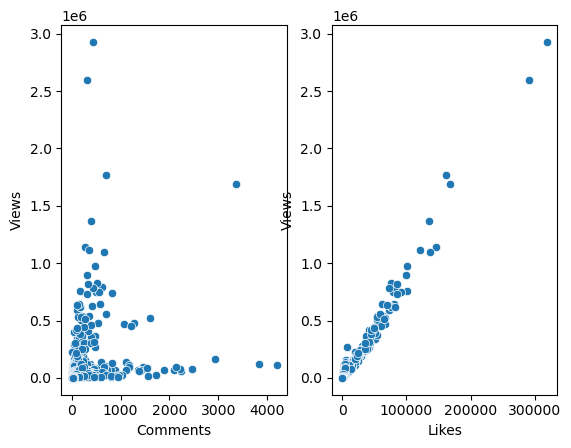

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

sns.scatterplot(data=video_data, x='Comments', y='Views', ax=ax[0])
sns.scatterplot(data=video_data, x='Likes', y='Views', ax=ax[1])

plt.show()